## Model metrics

In [1]:
import pandas as pd
import numpy as np
from metrics_utils import *
from  matplotlib.colors import LinearSegmentedColormap

GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping


In [2]:
LOG_PATH = "lightning_logs"
METRICS_PATH = "../Metrics"
model_ids = ['resnet18_cut_dataset',
            'resnet50_cut_dataset',
            'g_resnet18_cut_dataset',
            'g_resnet50_cut_dataset',
            'g_resnet18_cut_dataset_c',
            'g_resnet50_cut_dataset_c',
            'ce_resnet50_cut_dataset']

## Predictions on DESI dataset

In [5]:
repeat_metrics = get_predict_results_runs(model_ids,5,METRICS_PATH,print_latex=True)
repeat_metrics.head(7) #Takes 4 mins

\begin{tabular}{llllllr}
\hline
                          & ACW                   & CW                    & Other                   & S/Z Ratio   & C Viol        &       Total \\
\hline
 resnet18\_cut\_dataset     & 119515 (1.4\%) ± 6911  & 108011 (1.3\%) ± 2279  & 8384134 (97.4\%) ± 5022  & 1.11 ± 0.08 & 23.92 ± 18.81 & 4.30583e+07 \\
 resnet50\_cut\_dataset     & 130157 (1.5\%) ± 5087  & 132413 (1.5\%) ± 11446 & 8349090 (97.0\%) ± 13118 & 0.99 ± 0.10 & -3.98 ± 23.79 & 4.30583e+07 \\
 g\_resnet18\_cut\_dataset   & 133378 (1.5\%) ± 10019 & 117627 (1.4\%) ± 2564  & 8360655 (97.1\%) ± 8946  & 1.14 ± 0.10 & 31.07 ± 23.17 & 4.30583e+07 \\
 g\_resnet50\_cut\_dataset   & 129642 (1.5\%) ± 7201  & 118142 (1.4\%) ± 2634  & 8363876 (97.1\%) ± 7873  & 1.10 ± 0.06 & 22.93 ± 14.73 & 4.30583e+07 \\
 g\_resnet18\_cut\_dataset\_c & 122902 (1.4\%) ± 8296  & 123142 (1.4\%) ± 8336  & 8365616 (97.1\%) ± 16632 & 1.00 ± 0.00 & -0.48 ± 0.38  & 4.30583e+07 \\
 g\_resnet50\_cut\_dataset\_c & 126247 (1.5\%) ± 5

Model,ACW,CW,Other,S/Z Ratio,C Viol,Total
resnet18,119515 (1.4%) ± 6911,108011 (1.3%) ± 2279,8384134 (97.4%) ± 5022,1.11 ± 0.08,23.92 ± 18.81,43058300.0
resnet50,130157 (1.5%) ± 5087,132413 (1.5%) ± 11446,8349090 (97.0%) ± 13118,0.99 ± 0.10,-3.98 ± 23.79,43058300.0
g_resnet18,133378 (1.5%) ± 10019,117627 (1.4%) ± 2564,8360655 (97.1%) ± 8946,1.14 ± 0.10,31.07 ± 23.17,43058300.0
g_resnet50,129642 (1.5%) ± 7201,118142 (1.4%) ± 2634,8363876 (97.1%) ± 7873,1.10 ± 0.06,22.93 ± 14.73,43058300.0
g_resnet18_c,122902 (1.4%) ± 8296,123142 (1.4%) ± 8336,8365616 (97.1%) ± 16632,1.00 ± 0.00,-0.48 ± 0.38,43058300.0
g_resnet50_c,126247 (1.5%) ± 5806,126661 (1.5%) ± 5899,8358752 (97.1%) ± 11705,1.00 ± 0.00,-0.82 ± 0.26,43058300.0
ce_resnet50,111952 (1.3%) ± 2765,112272 (1.3%) ± 2587,8387436 (97.4%) ± 5348,1.00 ± 0.00,-0.68 ± 0.55,43058300.0


In [22]:
predicted_viols = np.array([[23.92, 18.81],
                   [-3.98 , 23.79],
                   [31.07 ,23.17],
                   [22.93 , 14.73],
                   [-0.48 , 0.38],
                [-0.82 , 0.26],
                [-0.68 , 0.55]])

viol_fits = np.array([[0.84,-0.41],
             [0.85,-0.9],
             [0.86,0.23],
             [0.85,-0.24],
             [0.87,-0.36],
             [0.88,-0.66],
             [0.85,-0.11],
])

repeat_metrics_viols = pd.DataFrame(columns=["C Viol","Adjusted C Viol"],index=model_ids)
for i,model in enumerate(model_ids):
    v, v_err = predicted_viols[i]
    m,c = viol_fits[i]
    cv, cv_err = m*v+c,m*v_err
    repeat_metrics_viols.loc[model]["C Viol"] = f"{v:.2f} ± {v_err:.2f}"
    repeat_metrics_viols.loc[model]["Adjusted C Viol"] = f"{cv:.2f} ± {cv_err:.2f}"
repeat_metrics_viols.head(7)

,C Viol,Adjusted C Viol
resnet18_cut_dataset,23.92 ± 18.81,19.68 ± 15.80
resnet50_cut_dataset,-3.98 ± 23.79,-4.28 ± 20.22
g_resnet18_cut_dataset,31.07 ± 23.17,26.95 ± 19.93
g_resnet50_cut_dataset,22.93 ± 14.73,19.25 ± 12.52
g_resnet18_cut_dataset_c,-0.48 ± 0.38,-0.78 ± 0.33
g_resnet50_cut_dataset_c,-0.82 ± 0.26,-1.38 ± 0.23
ce_resnet50_cut_dataset,-0.68 ± 0.55,-0.69 ± 0.47


## Preserving chirality violation of test dataset when predicting

In [3]:
chirality_list = [-12,-9,-6,-3,0,3,6,9,12]
cviol_table = get_predict_results_runs_cviol(model_ids,chirality_list,METRICS_PATH)
#cviol_table.head(5)

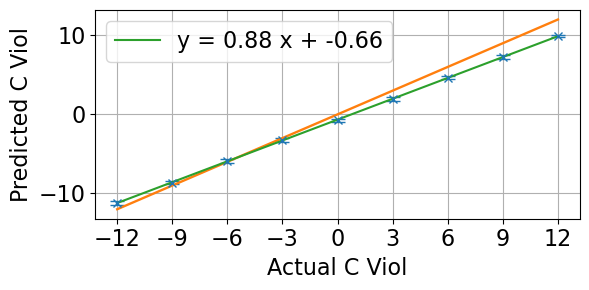

In [17]:
#Plot single graph
id = 'g_resnet50_cut_dataset_c'
plot_cviols(get_predict_results_runs_cviol([id],chirality_list,METRICS_PATH),[id],chirality_list,title=False,dims=(6,3))

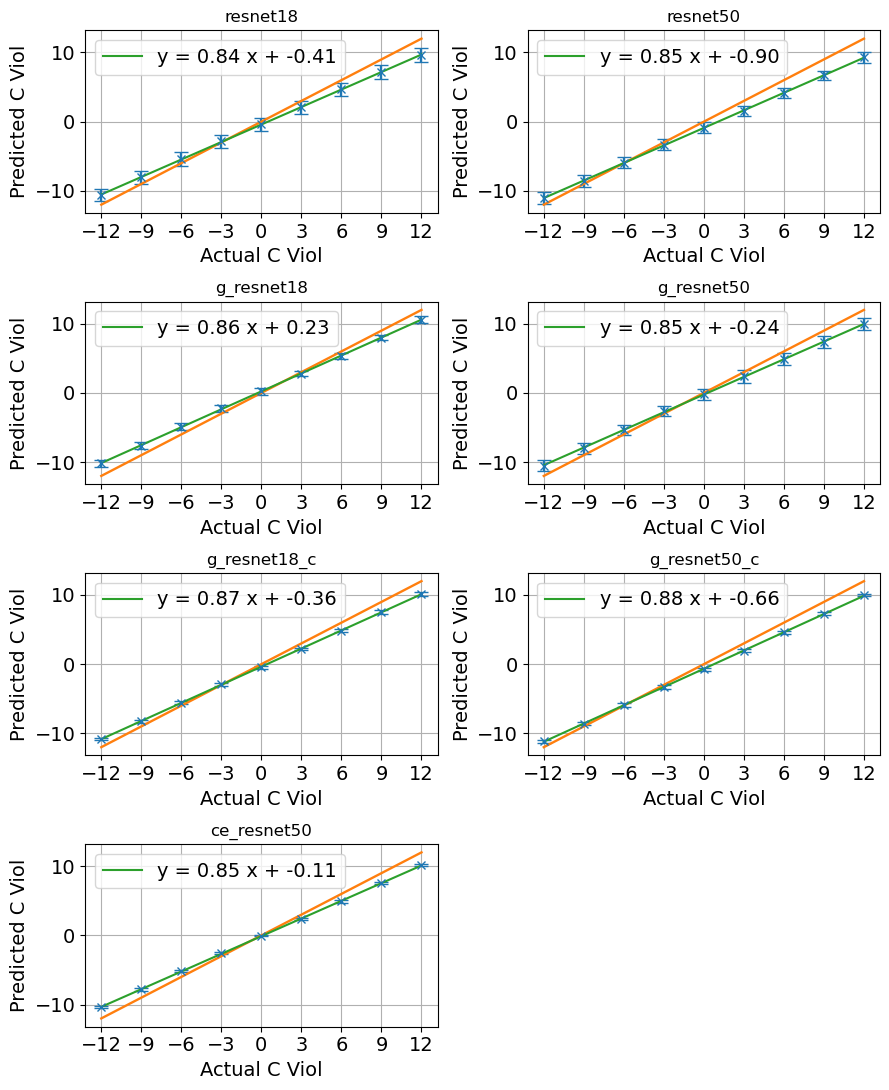

In [ ]:
plot_cviols(cviol_table,model_ids,chirality_list)

In [ ]:
#plot_spiral_nums(cviol_table,model_ids,chirality_list)

In [ ]:
def get_total_spirals(repeat_metrics,model_ids,print_latex=False,clean_titles=True):
    spiral_metrics = pd.DataFrame(columns=["Total Spirals"],index=model_ids)
    num_actual = 2333
    for i,model in enumerate(model_ids):
        num_spirals = np.array(repeat_metrics["N Spirals"].iloc[i])#/num_actual
        num_spirals_err = np.array(repeat_metrics["N Spirals Err"].iloc[i])#/num_actual
        spiral_metrics.loc[model] = {"Total Spirals": f"{np.average(num_spirals):.0f} ({np.average(num_spirals)/num_actual:.1%}) ± {np.average(num_spirals_err):.0f}"}
    if clean_titles:
        spiral_metrics.index = spiral_metrics.index.str.replace('_cut_dataset','')
        spiral_metrics.index = spiral_metrics.index.str.replace('_repeat','')
    if print_latex:
        print(tabulate(spiral_metrics,headers='keys',tablefmt='latex'))
    
    return spiral_metrics

spiral_counts = get_total_spirals(cviol_table,model_ids,clean_titles=True,print_latex=False)
spiral_counts.head(15)

,Total Spirals
resnet18,1675 (71.8%) ± 24
resnet50,1674 (71.8%) ± 39
g_resnet18,1726 (74.0%) ± 40
g_resnet50,1686 (72.3%) ± 27
g_resnet18_c,1772 (76.0%) ± 49
g_resnet50_c,1748 (74.9%) ± 31
ce_resnet50,1692 (72.5%) ± 28


## Density plots comparing predicted vs actual probabilities

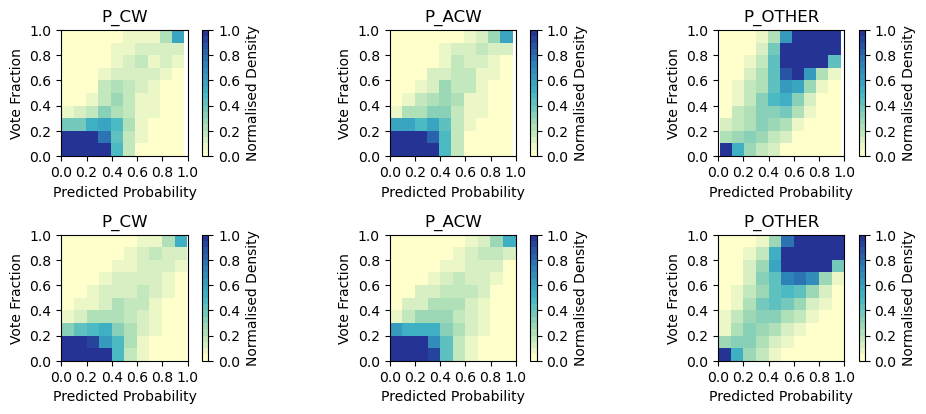

In [25]:
TESTING_CATALOG_PATH = '../Data/gz1_desi_cross_cat_testing.csv'
def plot_prob_histogram(model_ids,run=0,dataset_name="cut_test_dataset"):
    labels = ['CW','ACW','Other']
    actual_labels = ['P_CW','P_ACW','P_OTHER']

    actual = pd.read_csv('../Data/gz1_desi_cross_cat_testing.csv', on_bad_lines = 'skip',dtype="str")[actual_labels]
    mapcolours = ['#ffffcc','#a1dab4','#41b6c4','#2c7fb8','#253494']
    custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', mapcolours,N=20)
    fig = plt.figure(figsize=(10,12))
    for j,model in enumerate(model_ids):
        predictions = pd.read_csv(f"{METRICS_PATH}/{model}/version_{run}/{dataset_name}_predictions.csv",header=None,names=labels, on_bad_lines = 'skip').astype('float')
        for i, (pred_label, act_label) in enumerate(zip(labels,actual_labels)):
            ax_i = fig.add_subplot(3*len(model_ids),3,i+1+(3*j))
            act = actual[act_label][:-1].astype(float)
            preds = predictions[pred_label].astype(float)
            hist = plt.hist2d(preds,act, bins=10, density=True,cmap=custom_cmap,vmin=0, vmax=1)

            ax_i.set_title(actual_labels[i])
            ax_i.set_yticks(np.arange(0,1.2,0.2))
            ax_i.set_xticks(np.arange(0,1.2,0.2))
            ax_i.set_box_aspect(1)
            ax_i.set_xlabel("Predicted Probability")
            ax_i.set_ylabel("Vote Fraction")  
            fig.colorbar(hist[3],ax=ax_i,ticks=[0.0, 0.2, 0.4, 0.6,0.8,1.0],label='Normalised Density')
    plt.tight_layout()
    plt.show()
plot_prob_histogram(['ce_resnet50_cut_dataset','g_resnet18_cut_dataset_c'])
# plot_prob_histogram(model_ids[2:4])
# plot_prob_histogram(model_ids[4:6])
# plot_prob_histogram(model_ids[6:])

In [ ]:
def plot_vote_fractions(cat,title):
    labels = ["CW","ACW","Other"]
    nice_labels = ["Clockwise Spiral","Anticlockwise Spiral","Other"]
    fig = plt.figure(figsize=(10,3))
    for i, labels in enumerate(labels):
        ax_i = fig.add_subplot(1,3,i+1)
        ax_i.hist(cat[labels],bins=10)
        ax_i.set_title(nice_labels[i])
        ax_i.set_ylim(0,1000)
        ax_i.set_xlim(0,1)
        if i==0:
            ax_i.set_ylabel("Count")
        elif i==1:
            ax_i.set_xlabel("Vote Fractions")
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

def compare_probabilities(model_ids,c_viol,run,dataset_name="cut_test_dataset"):
    for model in model_ids:
            predictions = pd.read_csv(f"{METRICS_PATH}/{model}/version_{run}/{dataset_name}_CVIOL_{c_viol}_predictions.csv", names=['CW','ACW','Other'],on_bad_lines = 'skip').astype('float')
            plot_vote_fractions(predictions,model.removesuffix('cut_test_dataset'))
#compare_probabilities(model_ids,0)

## Overlap values

In [87]:
def get_scores(model):
    sz_score = []
    zn_score = []
    sn_score = []
    for batch in [0,1,2,3]:
        try:
            overlaps = pd.read_csv(f"../rot_err/multi/{model}_overlap_index_{batch}.csv",names=['Softmax Prob','Overlap','Err'])
            #print(overlaps['SZ'])
            overlaps['Overlap'] = overlaps['Overlap'].str.replace(" ",",")
            for i in range(5):
                overlaps['Overlap'] = overlaps['Overlap'].str.replace(",,",",")
            overlaps['Overlap'] = overlaps['Overlap'].str.replace(",]","")
            overlaps['Overlap'] = overlaps['Overlap'].str.replace("[,","")
            overlaps['Overlap'] = overlaps['Overlap'].str.replace("]","")
            overlaps['Overlap'] = overlaps['Overlap'].str.replace("[","")
            cleaned_overlaps = pd.DataFrame(overlaps['Overlap'].str.split(',', expand=True)).astype('float')
            sz_score.append(cleaned_overlaps.loc[:,0])
            zn_score.append(cleaned_overlaps.loc[:,1])
            sn_score.append(cleaned_overlaps.loc[:,2])
        except:
            print(f"Error with {model} {batch}")
            #print(sz_score)
    return sz_score,zn_score,sn_score
gsz_score,gzn_score,gsn_score = get_scores("g_resnet50")
csz_score,czn_score,csn_score = get_scores("ce_resnet50")

def diff(score_a,score_b):
    max = np.min([len(score_a),len(score_b)])
    score_a = score_a[0:max,:]
    score_b = score_b[0:max,:]
    return np.count_nonzero((score_a-score_b)<-0.01)

sz_overlap_diff = diff(np.array(gsz_score),np.array(csz_score))
print(f"SZ Overlaps smaller in G: {sz_overlap_diff}, {sz_overlap_diff/1000:.2%}")
sz_overlap_diff = diff(np.array(csz_score),np.array(gsz_score))
print(f"SZ Overlaps larger in G: {sz_overlap_diff}, {sz_overlap_diff/1000:.2%}")

zn_overlap_diff = diff(np.array(gzn_score),np.array(czn_score))
print(f"ZN Overlaps smaller in G: {zn_overlap_diff}, {zn_overlap_diff/1000:.2%}")
zn_overlap_diff = diff(np.array(czn_score),np.array(gzn_score))
print(f"ZN Overlaps larger in G: {zn_overlap_diff}, {zn_overlap_diff/1000:.2%}")

sn_overlap_diff = diff(np.array(gsn_score),np.array(csn_score))
print(f"SN Overlaps smaller in G: {sn_overlap_diff}, {sn_overlap_diff/1000:.2%}")
sn_overlap_diff = diff(np.array(csn_score),np.array(gsn_score))
print(f"SN Overlaps larger in G: {sn_overlap_diff}, {sn_overlap_diff/1000:.2%}")

SZ Overlaps smaller in G: 193, 19.30%
SZ Overlaps larger in G: 112, 11.20%
ZN Overlaps smaller in G: 42, 4.20%
ZN Overlaps larger in G: 73, 7.30%
SN Overlaps smaller in G: 45, 4.50%
SN Overlaps larger in G: 53, 5.30%
